ロジスティック回帰によるアヤメのデータ（２次元）の識別

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
#from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

In [2]:
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

## colors
colors = ['red', 'green', 'blue']
markers = ['D', 'o', 'v']


# data = np.loadtxt("iris.dat",comments='#')
iris = datasets.load_iris()
X = iris.data[:100,:2]
y = iris.target[:100]
target_names = iris.target_names

print('Size of the data = ', X.shape)
n = X.shape[0]
mdim = X.shape[1]
print('N=', n, 'mdim=', mdim)
print('size of y', y.shape)

clf_LR = LogisticRegression(C=1.0, penalty='l2', tol=0.01)
clf_LR.fit(X, y)

coef_LR = clf_LR.coef_.ravel()
sparsity_LR = np.mean(coef_LR == 0) * 100

print("score with L1 penalty: %.4f" % clf_LR.score(X, y))
print("Sparsity with L1 penalty: %.2f%%" % sparsity_LR)

yy = clf_LR.predict(X)
pp = clf_LR.predict_proba(X)
print('Estimated Classes\n', yy)
print('Estimated Probability\n', pp)

Size of the data =  (100, 2)
N= 100 mdim= 2
size of y (100,)
score with L1 penalty: 0.9900
Sparsity with L1 penalty: 0.00%
Estimated Classes
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Estimated Probability
 [[0.89983916 0.10016084]
 [0.68882999 0.31117001]
 [0.87816841 0.12183159]
 [0.86151715 0.13848285]
 [0.94189875 0.05810125]
 [0.95284223 0.04715777]
 [0.94951292 0.05048708]
 [0.88576445 0.11423555]
 [0.82251023 0.17748977]
 [0.76195289 0.23804711]
 [0.90622833 0.09377167]
 [0.92352331 0.07647669]
 [0.73422508 0.26577492]
 [0.89318733 0.10681267]
 [0.92334361 0.07665639]
 [0.98500934 0.01499066]
 [0.95284223 0.04715777]
 [0.89983916 0.10016084]
 [0.87789624 0.12210376]
 [0.96448783 0.03551217]
 [0.76172232 0.23827768]
 [0.94945196 0.05054804]
 [0.97519891 0.02480109]
 [0.81121383 0.18878617]
 [0.92352331 0.07647669]
 [0.63

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


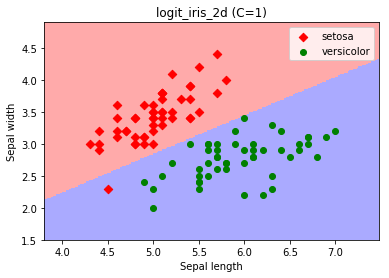

In [3]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

(xsize, ysize) = xx.shape
nelm = xsize * ysize

XX = np.c_[xx.reshape((nelm,1)), yy.reshape((nelm,1))]
#print XX

Z = clf_LR.predict(XX)
#print('Z\n', Z)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
#plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
for k, c, marker, target_name  in zip([0, 1], colors, markers, target_names):
    plt.scatter(X[y == k, 0], X[y == k, 1], c=c, marker=marker, label = target_name)
#plt.scatter(data[:, 0], data[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.legend()
plt.title('logit_iris_2d (C=1)')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.savefig('logit_iris_2d_C1.eps')

#plt.xlim(xx.min(), xx.max())
#plt.ylim(yy.min(), yy.max())
#plt.xticks(())
#plt.yticks(())

plt.show()

In [5]:
clf_LR = LogisticRegression(C=1000.0, penalty='l2', tol=0.01)
clf_LR.fit(X, y)

coef_LR = clf_LR.coef_.ravel()
sparsity_LR = np.mean(coef_LR == 0) * 100

print("score with L1 penalty: %.4f" % clf_LR.score(X, y))
print("Sparsity with L1 penalty: %.2f%%" % sparsity_LR)


yy = clf_LR.predict(X)

pp = clf_LR.predict_proba(X)

print('Estimated Classes\n', yy)
print('Estimated Probability\n', pp)




score with L1 penalty: 1.0000
Sparsity with L1 penalty: 0.00%
Estimated Classes
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Estimated Probability
 [[9.99860898e-01 1.39102125e-04]
 [9.92622157e-01 7.37784288e-03]
 [9.99957820e-01 4.21804833e-05]
 [9.99956602e-01 4.33975477e-05]
 [9.99989520e-01 1.04804962e-05]
 [9.99965435e-01 3.45649311e-05]
 [9.99999140e-01 8.59885724e-07]
 [9.99856885e-01 1.43115340e-04]
 [9.99954062e-01 4.59380354e-05]
 [9.97992794e-01 2.00720564e-03]
 [9.99528146e-01 4.71854047e-04]
 [9.99988906e-01 1.10940447e-05]
 [9.97934996e-01 2.06500392e-03]
 [9.99996539e-01 3.46085244e-06]
 [9.98445462e-01 1.55453790e-03]
 [9.99997676e-01 2.32394181e-06]
 [9.99965435e-01 3.45649311e-05]
 [9.99860898e-01 1.39102125e-04]
 [9.94114969e-01 5.88503054e-03]
 [9.99997244e-01 2.75644962e-06]
 [9.76728235e-01 2.32717650e-02]

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


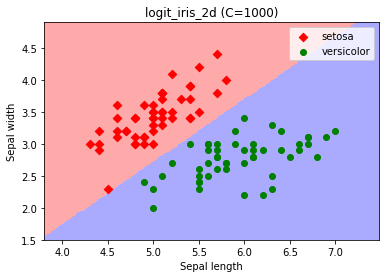

In [6]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

(xsize, ysize) = xx.shape
nelm = xsize * ysize

XX = np.c_[xx.reshape((nelm,1)), yy.reshape((nelm,1))]
#print XX

Z = clf_LR.predict(XX)
#print('Z\n', Z)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
#plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
for k, c, marker, target_name  in zip([0, 1], colors, markers, target_names):
    plt.scatter(X[y == k, 0], X[y == k, 1], c=c, marker=marker, label = target_name)
#plt.scatter(data[:, 0], data[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.legend()
plt.title('logit_iris_2d (C=1000)')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.savefig('logit_iris_2d_C1000.eps')

#plt.xlim(xx.min(), xx.max())
#plt.ylim(yy.min(), yy.max())
#plt.xticks(())
#plt.yticks(())

plt.show()

In [7]:
# 3 classes classification

# Data 
X = iris.data[:,:2]
y = iris.target
target_names = iris.target_names

print('Size of the data = ', X.shape)
n = X.shape[0]
mdim = X.shape[1]
print('N=', n, 'mdim=', mdim)
print('size of y', y.shape)

Size of the data =  (150, 2)
N= 150 mdim= 2
size of y (150,)


In [8]:
clf_LR = LogisticRegression(C=1.0, penalty='l2', tol=0.01, multi_class='multinomial', solver ='newton-cg')
clf_LR.fit(X, y)

coef_LR = clf_LR.coef_.ravel()
sparsity_LR = np.mean(coef_LR == 0) * 100

print("score with L1 penalty: %.4f" % clf_LR.score(X, y))
print("Sparsity with L1 penalty: %.2f%%" % sparsity_LR)

yy = clf_LR.predict(X)
pp = clf_LR.predict_proba(X)
print('Estimated Classes\n', yy)
print('Estimated Probability\n', pp)

score with L1 penalty: 0.8200
Sparsity with L1 penalty: 0.00%
Estimated Classes
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 1 2 1 2 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1
 2 2 2 2 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 2 1 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
Estimated Probability
 [[9.23457387e-01 5.85214309e-02 1.80211822e-02]
 [7.91537350e-01 1.80937542e-01 2.75251081e-02]
 [9.42346358e-01 5.08794386e-02 6.77420337e-03]
 [9.40534438e-01 5.37769878e-02 5.68857443e-03]
 [9.61842068e-01 2.96236853e-02 8.53424708e-03]
 [9.43185962e-01 3.40956495e-02 2.27183882e-02]
 [9.80220089e-01 1.74247360e-02 2.35517552e-03]
 [9.22910094e-01 6.19366182e-02 1.51532882e-02]
 [9.35976691e-01 6.00159710e-02 4.00733746e-03]
 [8.47155968e-01 1.31188045e-01 2.16559866e-02]
 [8.90201437e-01 7.01201290e-02 3.96784338e-02]
 [9.60780582e-01 3.31848277e-02 6.03459044e-03]
 [8.43526565e-

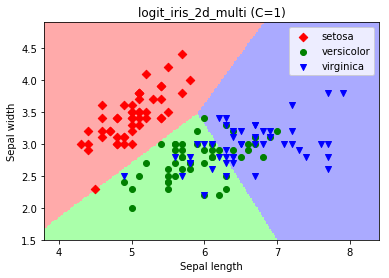

In [9]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

(xsize, ysize) = xx.shape
nelm = xsize * ysize

XX = np.c_[xx.reshape((nelm,1)), yy.reshape((nelm,1))]
#print XX

Z = clf_LR.predict(XX)
#print('Z\n', Z)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
#plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
for k, c, marker, target_name  in zip([0, 1, 2], colors, markers, target_names):
    plt.scatter(X[y == k, 0], X[y == k, 1], c=c, marker=marker, label = target_name)
#plt.scatter(data[:, 0], data[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.legend()
plt.title('logit_iris_2d_multi (C=1)')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.savefig('logit_iris_2d_3class_C1.eps')

#plt.xlim(xx.min(), xx.max())
#plt.ylim(yy.min(), yy.max())
#plt.xticks(())
#plt.yticks(())

plt.show()